# <생선의 길이, 무게를 통해 생선 이름을 예측하는 모델>

### 도미 특징



In [ ]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

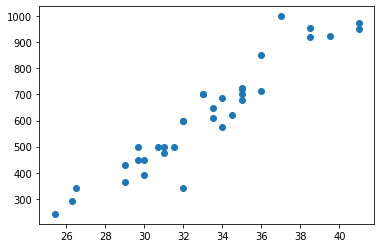

In [ ]:
# 길이를 x축, 무게를 y축으로 하겠음
# 일단 무게와 길이의 데이터를 시각화해서 눈으로 체크

import matplotlib.pyplot as plt
x = bream_length
y = bream_weight
plt.scatter(x,y)
plt.show()

### 빙어 특징

In [ ]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

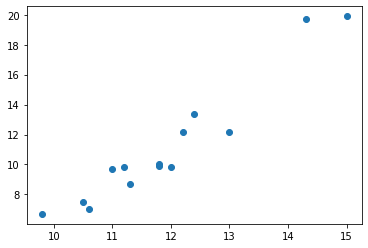

In [ ]:
plt.scatter(smelt_length, smelt_weight)
plt.show()

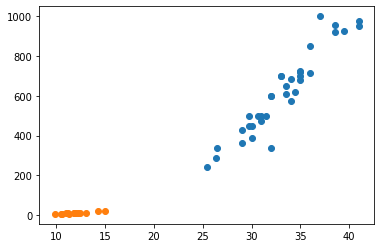

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.show()

# KNN 알고리즘


In [ ]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

사이킷런을 사용하기 위해서는<br>
특성의 리스트를 세로 방향의 2차원으로 만들어야함

In [ ]:
fish_data = [[l,w] for l,w in zip(length, weight)]
print(fish_data)

# or
# fish_data = np.column_stack((fish_length,fish_weight))

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


도미는 1 (도미 데이터 35개)

빙어는 0 (빙어 데이터 14개)


In [ ]:
fish_target = [1]*35 + [0]*14
print(fish_target)

# or
# fish_target = np.concatenate((np.ones(35),np.zeros(14)))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
# KNN 알고리즘을 위한 모듈 불러오기
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

# numpy를 활용하여 train_data, test_data로 나눔
# 근데 사실 sklearn으로 나누는게 편함

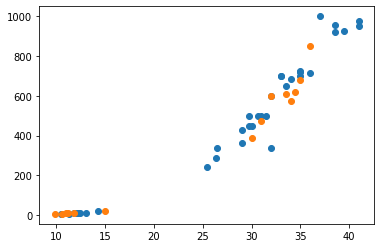

In [ ]:
import numpy as np
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])

plt.show()

# sklearn으로 데이터 나누기

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)

위에서 만든 객체에 fish_data, fish_target 데이터를 전달하여 학습시킨다.

머신러닝에서는 이 작업을 **훈련**이라 부른다.

In [ ]:
kn.fit(train_input, train_target)

KNeighborsClassifier()

### 학습 완료 -> 평가 차례
### 사이킷런에서는 학습을 평가하는 메소드로 score를 사용
평가에서 0~1값 반환됨.  1에 가까울수록 학습 잘 된 것

In [ ]:
kn.score(test_input,test_target)

1.0

## 학습이 잘됨이 확인됨.
## 해당 모델을 이용해 예측 시도

In [ ]:
print(kn.predict(test_input))
print(test_target)

[1 0 0 0 1 1 1 1 1 1 1 1 1]
[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


# KNN 원리
모델에게 훈련시킨 데이터를 가지고 있다가 새로운 데이터가 들어오면 가장 가까운 데이터를 참고하여 자신의 값을 판단한다.<br>
그럼 몇 개의 데이틀 참고하는가?<br>
디폴트는 5개의 데이터지만 다음과 같이 직접 설정할 수 있다.

```
kn.n_neighbors=49  # 49개의 데이터를 참고해서 결과값 도출
```
위 모델에 49개의 데이터를 참고하라고 설정하면 어떤 데이터도 도미로 예측할 것이다.

In [ ]:
# 기타 정보들

print(kn._fit_X)
print(kn._y)

[[  30.   450. ]
 [  29.   363. ]
 [  29.7  500. ]
 [  11.3    8.7]
 [  11.8   10. ]
 [  13.    12.2]
 [  32.   600. ]
 [  30.7  500. ]
 [  33.   700. ]
 [  35.   700. ]
 [  41.   975. ]
 [  38.5  920. ]
 [  25.4  242. ]
 [  12.     9.8]
 [  39.5  925. ]
 [  29.7  450. ]
 [  37.  1000. ]
 [  31.   500. ]
 [  10.5    7.5]
 [  26.3  290. ]
 [  34.   685. ]
 [  26.5  340. ]
 [  10.6    7. ]
 [   9.8    6.7]
 [  35.   680. ]
 [  11.2    9.8]
 [  31.   475. ]
 [  34.5  620. ]
 [  33.5  610. ]
 [  15.    19.9]
 [  34.   575. ]
 [  30.   390. ]
 [  11.8    9.9]
 [  32.   600. ]
 [  36.   850. ]
 [  11.     9.7]]
[1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 1 0]


In [ ]:
import pandas as pd
fish = pd.read_csv('hhtps:/')